In [1]:
import pandas as pd
import sqlite3

df = pd.read_csv("salaries.csv")

In [2]:
conn = sqlite3.connect('salaries.db')

In [3]:
df.to_sql("salaries", conn, if_exists="replace", index=False)

151445

In [4]:
pd.read_sql("SELECT * FROM salaries LIMIT 5", conn)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [5]:
pd.read_sql("SELECT ROUND(AVG(salary_in_usd), 2) AS avg_salary FROM salaries", conn)

,avg_salary
0,157527.46


In [6]:
pd.read_sql("""
    SELECT experience_level, 
           ROUND(AVG(salary_in_usd), 2) AS avg_salary,
           COUNT(*) AS num_jobs
    FROM salaries 
    GROUP BY experience_level 
    ORDER BY avg_salary DESC
""", conn)

,experience_level,avg_salary,num_jobs
0,EX,200471.43,4163
1,SE,172657.76,87491
2,MI,142301.18,46128
3,EN,98961.74,13663


In [7]:
pd.read_sql("""
    SELECT job_title, 
           ROUND(AVG(salary_in_usd), 2) AS avg_salary,
           COUNT(*) AS num_jobs
    FROM salaries 
    GROUP BY job_title 
    ORDER BY avg_salary DESC 
    LIMIT 10
""", conn)

,job_title,avg_salary,num_jobs
0,Research Team Lead,450000.00,2
1,Analytics Engineering Manager,399880.00,1
2,Data Science Tech Lead,375000.00,1
3,Applied AI ML Lead,292500.00,2
4,Head of Machine Learning,286805.74,19
5,IT Enterprise Data Architect,284090.00,1
6,Head of Applied AI,273875.00,8
7,AIRS Solutions Specialist,263250.00,6
8,Machine Learning Performance Engineer,262500.00,2
9,Director of Product Management,259155.54,28


In [8]:
pd.read_sql("""
    SELECT 
        CASE remote_ratio 
            WHEN 0 THEN 'On-site' 
            WHEN 50 THEN 'Hybrid' 
            WHEN 100 THEN 'Remote' 
        END AS work_type,
        ROUND(AVG(salary_in_usd), 2) AS avg_salary,
        COUNT(*) AS num_jobs
    FROM salaries 
    GROUP BY remote_ratio
    ORDER BY avg_salary DESC
""", conn)

,work_type,avg_salary,num_jobs
0,On-site,159382.78,119570
1,Remote,151285.86,31546
2,Hybrid,81711.63,329


In [9]:
pd.read_sql("""
    SELECT work_year, 
           ROUND(AVG(salary_in_usd), 2) AS avg_salary,
           COUNT(*) AS num_jobs
    FROM salaries 
    GROUP BY work_year 
    ORDER BY work_year
""", conn)

,work_year,avg_salary,num_jobs
0,2020,102250.87,75
1,2021,99922.07,218
2,2022,134146.47,1661
3,2023,153682.16,8524
4,2024,159589.56,62241
5,2025,157018.98,78726


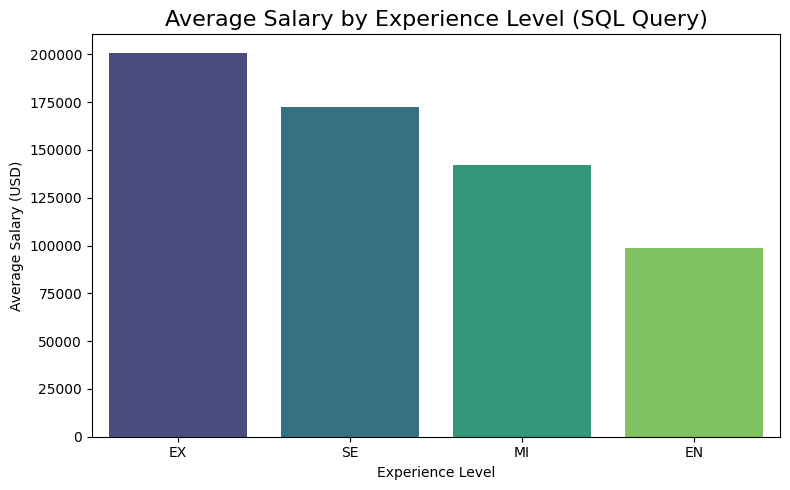

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

result = pd.read_sql("""
    SELECT experience_level, 
           ROUND(AVG(salary_in_usd), 2) AS avg_salary
    FROM salaries 
    GROUP BY experience_level 
    ORDER BY avg_salary DESC
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=result, x="experience_level", y="avg_salary", hue="experience_level", palette="viridis", legend=False)
plt.title("Average Salary by Experience Level (SQL Query)", fontsize=16)
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()

In [13]:
conn.close()